##### **Primeiro um script parar simular um arquivo CSV **

In [56]:
import random
import pandas as pd

# Função para gerar nomes fictícios
def generate_name():
    first_names = ["John", "Alice", "Bob", "Eve", "Charlie"]
    last_names = ["Smith", "Johnson", "Brown", "Lee", "Davis"]
    return f"{random.choice(first_names)} {random.choice(last_names)}"

# Gere dados de clientes
def generate_customers(num_customers):
    customers = []
    for i in range(num_customers):
        customer = {
            "CustomerID": i + 1,  # IDs começando em 1
            "Name": generate_name(),
            "Email": f"{generate_name().replace(' ', '.')}@example.com",
        }
        customers.append(customer)
    return pd.DataFrame(customers)

# Gere dados de produtos
def generate_products(num_products):
    products = []
    for i in range(num_products):
        product = {
            "ProductID": i + 1,  # IDs começando em 1
            "ProductName": f"Product {i + 1}",
            "Price": round(random.uniform(10, 1000), 2),
        }
        products.append(product)
    return pd.DataFrame(products)

# Gere dados de transações
def generate_transactions(num_transactions, customers, products):
    transactions = []
    for i in range(num_transactions):
        customer = random.choice(customers["CustomerID"])
        product = random.choice(products["ProductID"])
        transaction = {
            "TransactionID": i + 1,  # IDs começando em 1
            "CustomerID": customer,
            "ProductID": product,
            "Quantity": random.randint(1, 5),
            "TransactionDate": pd.Timestamp(
                random.randint(2018, 2023),
                random.randint(1, 12),
                random.randint(1, 28),
                random.randint(0, 23),
                random.randint(0, 59),
                random.randint(0, 59),
            ),
        }
        transactions.append(transaction)
    return pd.DataFrame(transactions)

# Gerar 100 clientes, 50 produtos e 500 transações fictícias
customers_df = generate_customers(100)
products_df = generate_products(50)
transactions_df = generate_transactions(500, customers_df, products_df)

# Salvar os dataframes em arquivos CSV
customers_df.to_csv("customers.csv", index=False)
products_df.to_csv("products.csv", index=False)
transactions_df.to_csv("transactions.csv", index=False)

print("Dados fictícios gerados e salvos em CSV.")


Dados fictícios gerados e salvos em CSV.


##### **Gerando os DataFrames**

In [57]:
# Carregue os arquivos CSV
customers_df = pd.read_csv("customers.csv")
products_df = pd.read_csv("products.csv")
transactions_df = pd.read_csv("transactions.csv")

# Exiba as primeiras linhas de cada DataFrame
print("Dados dos clientes:")
print(customers_df.head())

print("\nDados dos produtos:")
print(products_df.head())

print("\nDados das transações:")
print(transactions_df.head())

Dados dos clientes:
   CustomerID         Name                      Email
0           1  Eve Johnson  Alice.Johnson@example.com
1           2   John Smith     John.Davis@example.com
2           3    Alice Lee    Eve.Johnson@example.com
3           4    Bob Davis    Alice.Davis@example.com
4           5     John Lee     John.Brown@example.com

Dados dos produtos:
   ProductID ProductName   Price
0          1   Product 1  172.19
1          2   Product 2  421.56
2          3   Product 3  161.10
3          4   Product 4  794.75
4          5   Product 5  614.97

Dados das transações:
   TransactionID  CustomerID  ProductID  Quantity      TransactionDate
0              1          31         30         1  2020-12-16 07:47:37
1              2          33         41         3  2020-04-04 20:05:29
2              3          33          5         3  2022-06-17 08:07:28
3              4           1          9         4  2022-08-18 07:05:20
4              5          13          5         2  2023-12-

##### **Tratando os dados**

In [58]:
# Carrega os arquivos CSV
customers_df = pd.read_csv("customers.csv")
products_df = pd.read_csv("products.csv")
transactions_df = pd.read_csv("transactions.csv")

# Verifica e trate valores ausentes
customers_df.dropna(inplace=True)  # Remove linhas com valores ausentes

# Remove duplicatas, se houver
customers_df.drop_duplicates(subset="CustomerID", inplace=True)
products_df.drop_duplicates(subset="ProductID", inplace=True)
transactions_df.drop_duplicates(subset="TransactionID", inplace=True)

# Trate valores inválidos, se necessário
# substituindo preços negativos por zero
products_df["Price"] = products_df["Price"].apply(lambda x: max(0, x))

# Converte a coluna de datas para o tipo DateTime
transactions_df["TransactionDate"] = pd.to_datetime(transactions_df["TransactionDate"])



# Visualize os dados tratados
print("Dados dos clientes após tratamento:")
print(customers_df.head())

print("\nDados dos produtos após tratamento:")
print(products_df.head())

print("\nDados das transações após tratamento:")
print(transactions_df.head())

Dados dos clientes após tratamento:
   CustomerID         Name                      Email
0           1  Eve Johnson  Alice.Johnson@example.com
1           2   John Smith     John.Davis@example.com
2           3    Alice Lee    Eve.Johnson@example.com
3           4    Bob Davis    Alice.Davis@example.com
4           5     John Lee     John.Brown@example.com

Dados dos produtos após tratamento:
   ProductID ProductName   Price
0          1   Product 1  172.19
1          2   Product 2  421.56
2          3   Product 3  161.10
3          4   Product 4  794.75
4          5   Product 5  614.97

Dados das transações após tratamento:
   TransactionID  CustomerID  ProductID  Quantity     TransactionDate
0              1          31         30         1 2020-12-16 07:47:37
1              2          33         41         3 2020-04-04 20:05:29
2              3          33          5         3 2022-06-17 08:07:28
3              4           1          9         4 2022-08-18 07:05:20
4              5

##### **Análise descritiva dos dados, calculo de métricas-chave para obter uma compreensão profunda do conjunto de dados.**

In [59]:
# Calcular a receita para cada transação
transactions_df["Revenue"] = transactions_df["Quantity"] * transactions_df["ProductID"].map(products_df.set_index("ProductID")["Price"])

# Calcular a receita média por cliente
customer_revenue = transactions_df.groupby("CustomerID")["Revenue"].sum()
average_revenue_per_customer = customer_revenue.mean()
print(f"Receita média por cliente: ${average_revenue_per_customer:.2f}")

# Calcular a taxa de conversão
total_transactions = len(transactions_df)
total_visits = len(transactions_df["CustomerID"].unique())
conversion_rate = (total_transactions / total_visits) * 100
print(f"Taxa de conversão: {conversion_rate:.2f}%")

# Encontrar os produtos mais populares
product_popularity = transactions_df["ProductID"].value_counts()
most_popular_products = product_popularity.head(5)
print("Produtos mais populares:")
print(most_popular_products)

# Calcular estatísticas gerais das transações
transaction_statistics = transactions_df[["Quantity", "Revenue"]].describe()
print("Estatísticas das transações:")
print(transaction_statistics)

# Calcular a média, mediana e moda dos preços dos produtos
average_product_price = products_df["Price"].mean()
median_product_price = products_df["Price"].median()
mode_product_price = products_df["Price"].mode().iloc[0]
print(f"Média dos preços dos produtos: ${average_product_price:.2f}")
print(f"Mediana dos preços dos produtos: ${median_product_price:.2f}")
print(f"Moda dos preços dos produtos: ${mode_product_price:.2f}")

Receita média por cliente: $7486.43
Taxa de conversão: 505.05%
Produtos mais populares:
24    19
33    17
2     16
10    15
13    15
Name: ProductID, dtype: int64
Estatísticas das transações:
         Quantity      Revenue
count  500.000000   500.000000
mean     3.052000  1482.313280
std      1.408995  1230.281875
min      1.000000    35.240000
25%      2.000000   516.772500
50%      3.000000  1078.020000
75%      4.000000  2203.287500
max      5.000000  4939.250000
Média dos preços dos produtos: $477.82
Mediana dos preços dos produtos: $473.57
Moda dos preços dos produtos: $35.24


## **Gerando Gráfico para as métricas geradas anteriormente**



#### **Gráfico de Barras para Produtos Mais Populares:**

- **Escolhi um gráfico de barras porque ele é adequado para visualizar a contagem de vendas para diferentes produtos.**

- **Isso permite identificar facilmente quais produtos são os mais populares com base no número de vendas.**

- **A rotação das etiquetas no eixo x ajuda a tornar o gráfico mais legível.**

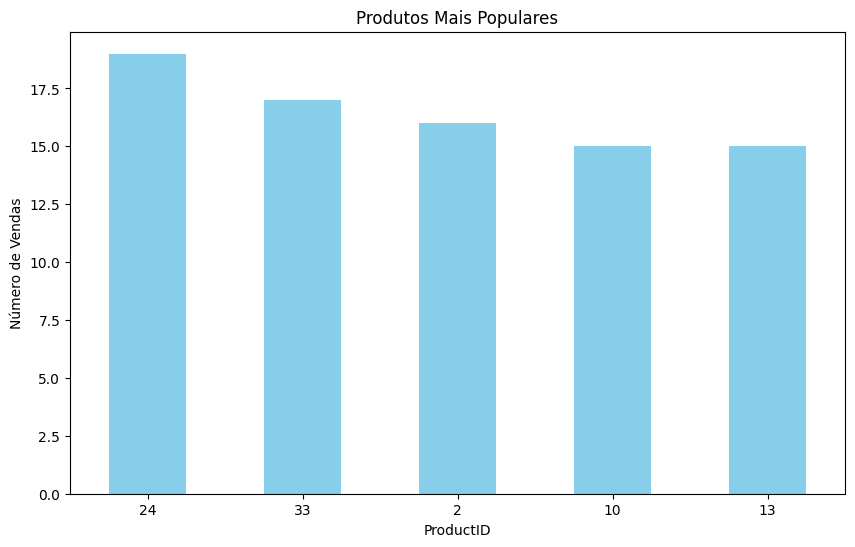

In [60]:
import matplotlib.pyplot as plt

# Carregue os DataFrames dos clientes, produtos e transações (como mencionado anteriormente)

# Calcular a receita para cada transação
transactions_df["Revenue"] = transactions_df["Quantity"] * transactions_df["ProductID"].map(products_df.set_index("ProductID")["Price"])

# Calcular a receita média por cliente
customer_revenue = transactions_df.groupby("CustomerID")["Revenue"].sum()
average_revenue_per_customer = customer_revenue.mean()

# Gráfico de barras para produtos mais populares
product_popularity = transactions_df["ProductID"].value_counts().head(5)
plt.figure(figsize=(10, 6))
product_popularity.plot(kind="bar", color="skyblue")
plt.title("Produtos Mais Populares")
plt.xlabel("ProductID")
plt.ylabel("Número de Vendas")
plt.xticks(rotation=0)
plt.show()



####**Gráfico de Pizza para a Taxa de Conversão:**

- **Um gráfico de pizza é uma escolha comum para representar partes proporcionais de um todo.**
- **Ele é adequado para mostrar a taxa de conversão, que é uma porcentagem relativa a um total.**
- **O uso de cores ajuda a destacar a diferença entre as partes (transações e visitas).**


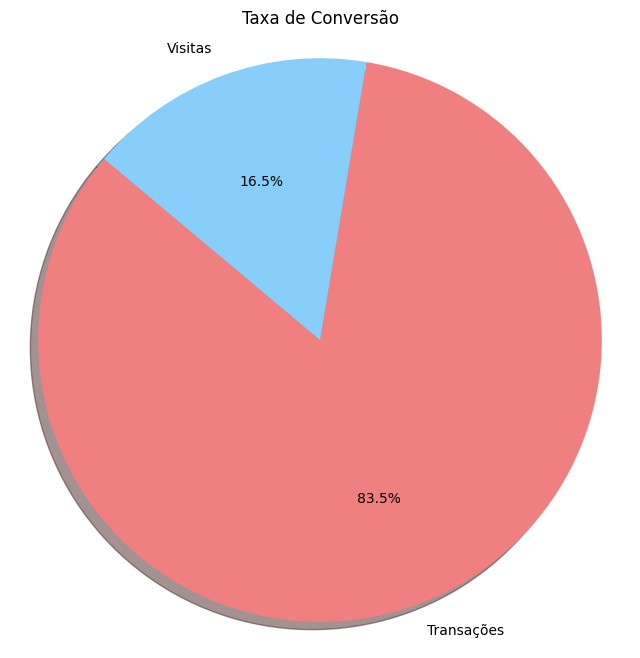

In [61]:
# Gráfico de pizza para a taxa de conversão
plt.figure(figsize=(8, 8))
labels = ["Transações", "Visitas"]
sizes = [total_transactions, total_visits]
colors = ["lightcoral", "lightskyblue"]
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Taxa de Conversão")
plt.axis('equal')
plt.show()



####**Gráfico de Barras para Média, Mediana e Moda dos Preços dos Produtos:**

- **Utilizei um gráfico de barras para comparar as estatísticas dos preços dos produtos.**
- **É útil para mostrar as diferenças entre a média, mediana e moda dos preços.**
- **As barras permitem uma fácil comparação visual entre as estatísticas.**


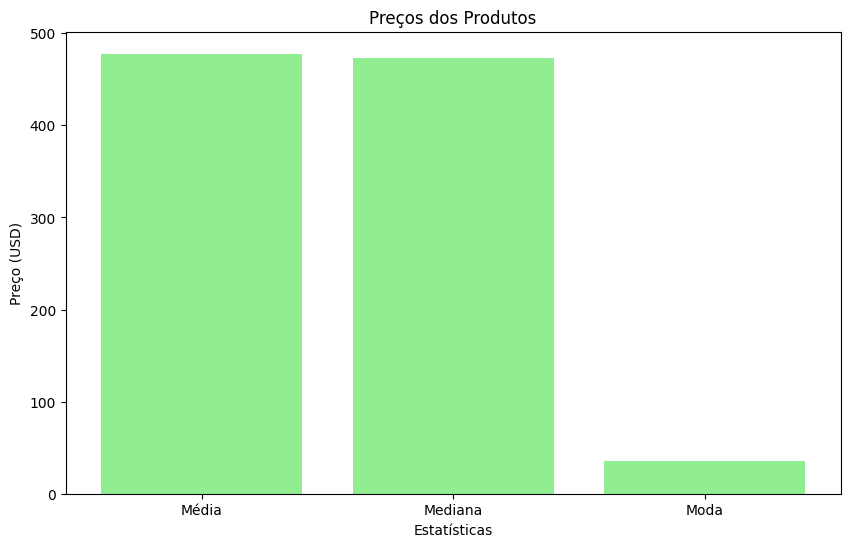

In [62]:
# Gráfico de barras para a média, mediana e moda dos preços dos produtos
plt.figure(figsize=(10, 6))
prices = [average_product_price, median_product_price, mode_product_price]
labels = ["Média", "Mediana", "Moda"]
plt.bar(labels, prices, color="lightgreen")
plt.title("Preços dos Produtos")
plt.xlabel("Estatísticas")
plt.ylabel("Preço (USD)")
plt.show()



####**Gráfico de Caixa para Estatísticas das Transações:**

- **O gráfico de caixa (boxplot) é útil para visualizar a distribuição de dados, como quantidade e receita das transações.**
- **Ele mostra os quartis, mediana e possíveis outliers.**
- **Ajuda a entender a variação dos valores das transações.**



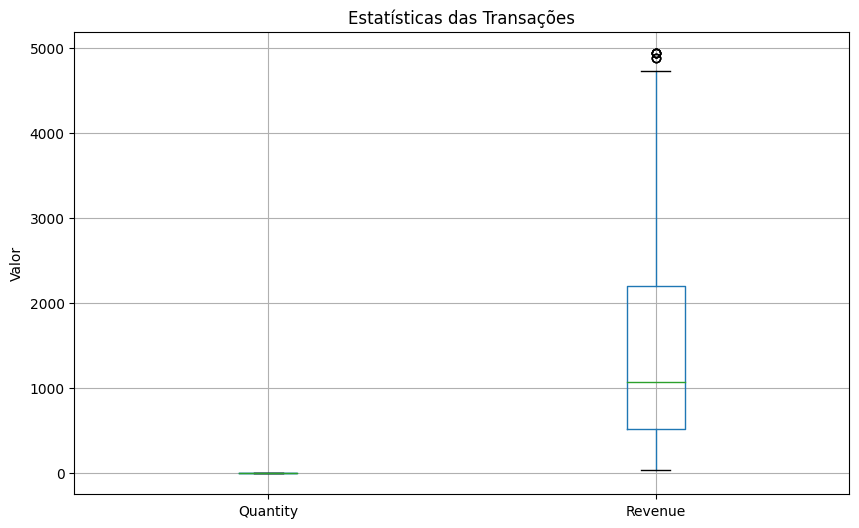

In [63]:
# Gráfico de caixa para estatísticas das transações
plt.figure(figsize=(10, 6))
transactions_df[["Quantity", "Revenue"]].boxplot()
plt.title("Estatísticas das Transações")
plt.ylabel("Valor")
plt.show()

#### **Analise de comportamento de Clientes**

**A escolha do gráfico de dispersão se deve há:**
- **Simplicidade Visual: O gráfico de dispersão é visualmente simples e intuitivo, o que facilita a compreensão dos resultados.**

- **Receita Total: O gráfico destaca a métrica principal do projeto, que é a "receita total" dos clientes. Isso ajuda a entender como os clientes se dividem com base nessa métrica-chave.**

- **Cores para Identificar Clusters: A atribuição de cores diferentes aos pontos permite identificar claramente os grupos de clientes (clusters) com padrões de compra semelhantes.**

- **Compreensão da Segmentação: O gráfico de dispersão ajuda a ver as diferenças entre grupos de clientes com base em sua receita total, tornando a análise de segmentação mais acessível.**

- **Visualização Eficaz: A representação gráfica é uma maneira eficaz de comunicar os resultados da análise de segmentação de forma clara e informativa.**





/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


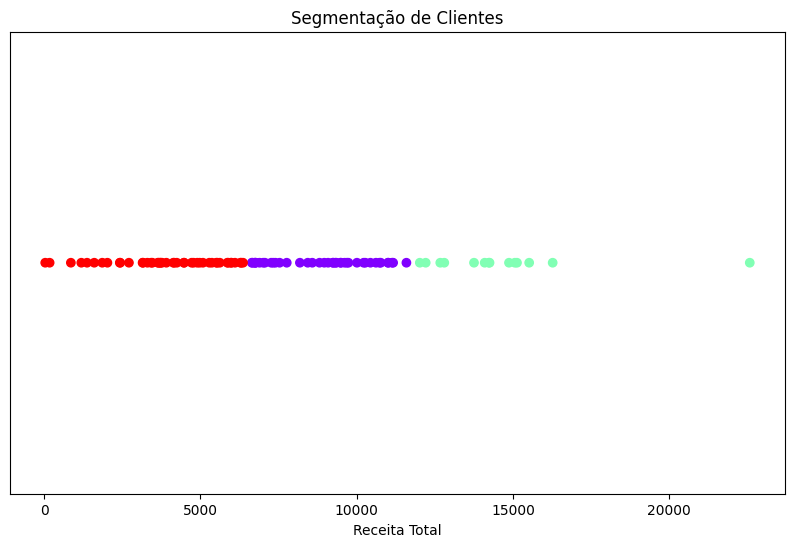

In [64]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Calculo apenas a receita total por cliente
customer_revenue = transactions_df.groupby("CustomerID")["Revenue"].sum()

# DataFrame para a segmentação
segmentation_data = pd.DataFrame({
    "TotalRevenue": customer_revenue,
})

# Normalização dos dados
scaler = StandardScaler()
scaled_data = scaler.fit_transform(segmentation_data)

# Aplique o algoritmo K-Means com o número de clusters desejado
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
segmentation_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize a segmentação
plt.figure(figsize=(10, 6))
plt.scatter(segmentation_data['TotalRevenue'], [0] * len(segmentation_data), c=segmentation_data['Cluster'], cmap='rainbow')
plt.title('Segmentação de Clientes')
plt.xlabel('Receita Total')
plt.yticks([])  # Removendo rótulos do eixo y
plt.show()

#### **Previsão de Vendas:**

- O gráfico é um scatter plot que compara as previsões do modelo (linha vermelha) com os valores reais de vendas (pontos cinzas).
- O eixo X representa as datas em números de dias a partir de uma data de referência.
- A proximidade entre os pontos azuis e a linha vermelha indica o quão precisas são as previsões do modelo.

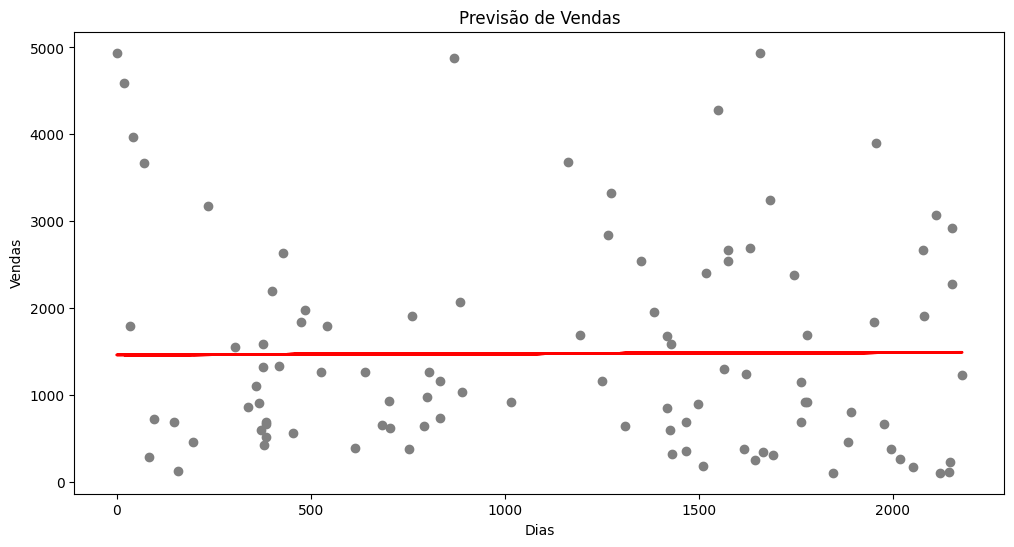

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Calcular a receita total para cada dia (ou período desejado)
daily_revenue = transactions_df.groupby("TransactionDate")["Revenue"].sum()


# Crie um DataFrame com a data (índice) e a receita diária
sales_data = pd.DataFrame({"Date": daily_revenue.index, "Sales": daily_revenue.values})

# Converter a coluna "Date" em um número de dias
sales_data["Date"] = (sales_data["Date"] - sales_data["Date"].min()).dt.days

# Dividir os dados em treinamento e teste
X = sales_data[["Date"]]  # Características (neste caso, data)
y = sales_data["Sales"]  # Variável alvo (vendas)

# Dividir os dados em treinamento (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Previsões usando o modelo treinado
y_pred = model.predict(X_test)

# Visualizar os resultados
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Previsão de Vendas')
plt.xlabel('Dias')
plt.ylabel('Vendas')
plt.show()


In [34]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163332 sha256=69063c27a75f2f9f96299922a5671d30c049e3773ae21b4cc829f070bd8f3901
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [66]:
transactions_df

,TransactionID,CustomerID,ProductID,Quantity,TransactionDate,Revenue
0,1,31,30,1,2020-12-16 07:47:37,226.85
1,2,33,41,3,2020-04-04 20:05:29,1368.03
2,3,33,5,3,2022-06-17 08:07:28,1844.91
3,4,1,9,4,2022-08-18 07:05:20,2946.28
4,5,13,5,2,2023-12-21 14:55:35,1229.94
...,...,...,...,...,...,...
495,496,4,33,3,2023-04-18 05:30:26,2757.30
496,497,4,6,4,2022-08-25 09:00:25,3434.48
497,498,26,41,1,2021-02-07 17:44:44,456.01
498,499,35,43,1,2022-08-26 00:56:25,79.65


####  Recomendações de Produtos

In [67]:
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split


# Crie uma coluna de classificação fictícia, pois Surprise requer uma coluna de classificação
transactions_df['Rating'] = [random.randint(1, 5) for _ in range(len(transactions_df))]


# Defina um objeto 'Reader' para informar ao Surprise sobre o intervalo de classificação
reader = Reader(rating_scale=(1, 5))

# Carregue os dados usando o Surprise Dataset
data = Dataset.load_from_df(transactions_df[['CustomerID', 'ProductID', 'Rating']], reader)

# Divida os dados em conjuntos de treinamento e teste
trainset, testset = train_test_split(data, test_size=0.2)

# Crie um modelo de filtragem colaborativa (KNN)
model = KNNBasic(sim_options={'user_based': False})

# Treine o modelo nos dados de treinamento
model.fit(trainset)

# Exiba algumas recomendações para um cliente específico (substitua 'CustomerID' pelo cliente desejado)
customer_id = 'CustomerID'  # Substitua pelo ID do cliente

# Encontre os produtos que o cliente já comprou
customer_purchased_products = transactions_df[transactions_df['CustomerID'] == customer_id]['ProductID'].unique()

# Crie uma lista de produtos que o cliente ainda não comprou
product_ids = transactions_df['ProductID'].unique()
products_not_purchased = [product_id for product_id in product_ids if product_id not in customer_purchased_products]

# Crie pares (cliente, produto) para fazer previsões
customer_product_pairs = [(customer_id, product_id, 5) for product_id in products_not_purchased]

# Faça previsões para os pares (cliente, produto)
recommendations = model.test(customer_product_pairs)

# Ordene as recomendações com base nas classificações previstas
recommendations.sort(key=lambda x: x.est, reverse=True)

# Exiba as principais recomendações
top_n = 10  # Número de recomendações
top_recommendations = recommendations[:top_n]
for recommendation in top_recommendations:
    print(f"ProductID: {recommendation.iid}, Predicted Rating: {recommendation.est}")


Computing the msd similarity matrix...
Done computing similarity matrix.
ProductID: 30, Predicted Rating: 3.03
ProductID: 41, Predicted Rating: 3.03
ProductID: 5, Predicted Rating: 3.03
ProductID: 9, Predicted Rating: 3.03
ProductID: 1, Predicted Rating: 3.03
ProductID: 45, Predicted Rating: 3.03
ProductID: 8, Predicted Rating: 3.03
ProductID: 29, Predicted Rating: 3.03
ProductID: 42, Predicted Rating: 3.03
ProductID: 22, Predicted Rating: 3.03


In [68]:
top_n = 10  # Número de recomendações
top_recommendations = recommendations[:top_n]

# Crie um DataFrame para armazenar as recomendações
recommendations_df = pd.DataFrame({'CustomerID': customer_id, 'ProductID': [recommendation.iid for recommendation in top_recommendations], 'Estimation': [recommendation.est for recommendation in top_recommendations]})

# Concatene o DataFrame de recomendações com transactions_df
transactions_df = pd.concat([transactions_df, recommendations_df], ignore_index=True)

In [69]:
transactions_df

,TransactionID,CustomerID,ProductID,Quantity,TransactionDate,Revenue,Rating,Estimation
0,1.0,31,30,1.0,2020-12-16 07:47:37,226.85,4.0,NaN
1,2.0,33,41,3.0,2020-04-04 20:05:29,1368.03,1.0,NaN
2,3.0,33,5,3.0,2022-06-17 08:07:28,1844.91,2.0,NaN
3,4.0,1,9,4.0,2022-08-18 07:05:20,2946.28,5.0,NaN
4,5.0,13,5,2.0,2023-12-21 14:55:35,1229.94,1.0,NaN
...,...,...,...,...,...,...,...,...
505,NaN,CustomerID,45,NaN,NaT,NaN,NaN,3.03
506,NaN,CustomerID,8,NaN,NaT,NaN,NaN,3.03
507,NaN,CustomerID,29,NaN,NaT,NaN,NaN,3.03
508,NaN,CustomerID,42,NaN,NaT,NaN,NaN,3.03


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_0, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['TransactionID'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_2, *['ProductID'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['Quantity'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(_df_4, *['index', 'TransactionID'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(_df_5, *['TransactionID', 'ProductID'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(_df_6, *['ProductID', 'Quantity'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(_df_7, *['Quantity', 'Revenue'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_8, *['TransactionDate', 'TransactionID', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_9, *['TransactionDate', 'ProductID', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_10, *['TransactionDate', 'Quantity', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_11, *['TransactionDate', 'Revenue', None], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_12, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_13, *['TransactionID'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_14, *['ProductID'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_15, *['Quantity'], **{})
chart